# Introduction
Name | Abid Ilmun Fisabil<br>
Batch | FTDS-006<br>
Phase | 1

## Data Description
About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

Dataset is taken for learning purpose. Source of the data :https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

## Objective
to create a model based on DecisionTree and RandomForest that is able to predict or classify probability that a person getting heart attack

# Importing Modules

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gs, RandomizedSearchCV as rs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report as cr
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [131]:
df = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploration

In [132]:
df.shape

(303, 14)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [134]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

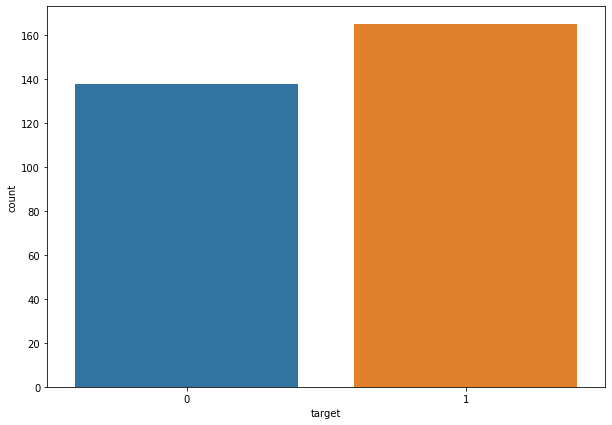

In [135]:
plt.figure(figsize = (10,7))
sns.countplot(df.target);

### **Brief Insinghts**
- the dataset consists of 304 observations each has 14 features
- it seems that the data is already clean and encoded, so we couldn't find any missing values, category inconsistency, incorrect data tyeps and so on and so forth
- the problem is that features are already in numerical format. for the sake of normality handling, we need to seperate categorical and numerical features manually.
- last thing we can see is that the data seems to have pretty balanced target, not exactly but quite fair

In [136]:
# seperating numerical and categorical features
num_cols = ['age','trestbps','chol','thalach','oldpeak']
obj_cols = [col for col in df.columns if col not in num_cols]

In [137]:
df[num_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [138]:
df[obj_cols].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


## EDA

In [139]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


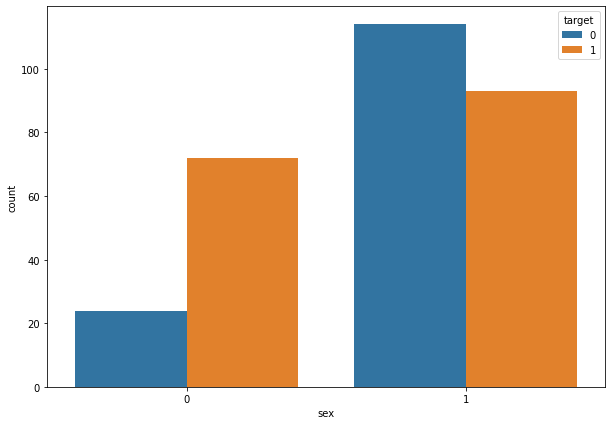

In [140]:
plt.figure(figsize = (10,7))
sns.countplot(df.sex,hue = df.target);

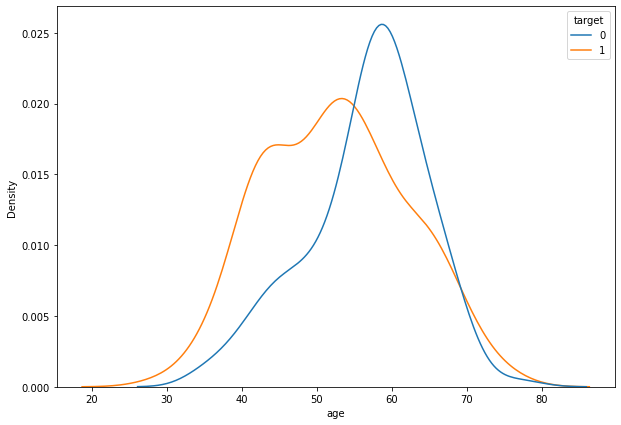

In [141]:
plt.figure(figsize = (10,7))
sns.kdeplot(df.age, hue = df.target);

In [142]:
male_ha_rate = len(df[df.sex == 1][df[df.sex == 1].target == 1])/len(df[df.sex == 1])
female_ha_rate = len(df[df.sex == 0][df[df.sex == 0].target == 1])/len(df[df.sex == 0])

print(f'man haeart attack rate relative to its standalone distribution   =  {round(male_ha_rate,2)} \nwoman haeart attack rate relative to its standalone distribution =  {round(female_ha_rate,2)}')

man haeart attack rate relative to its standalone distribution   =  0.45 
woman haeart attack rate relative to its standalone distribution =  0.75


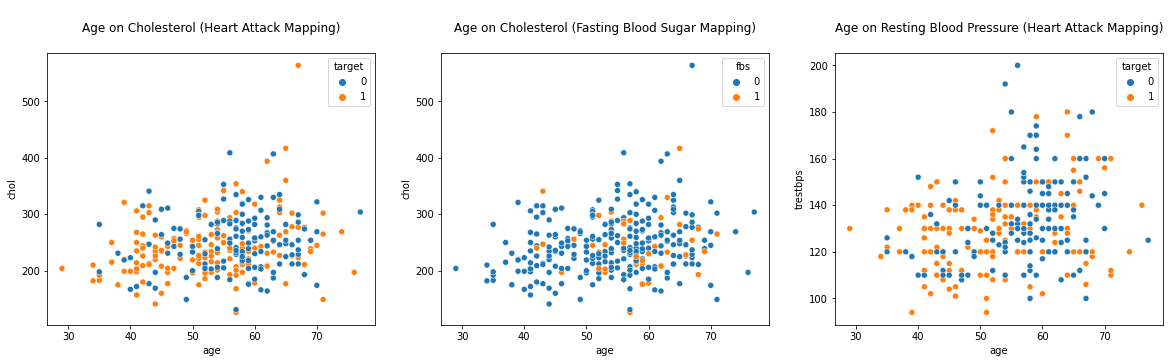

In [143]:
fig, ax = plt.subplots(1,3,figsize = (20,5))

sns.scatterplot(df.age,df.chol, hue = df.target, ax = ax[0])
sns.scatterplot(df.age,df.chol, hue = df.fbs, ax = ax[1])
sns.scatterplot(df.age,df.trestbps, hue = df.target, ax = ax[2])

ax[0].set_title('\nAge on Cholesterol (Heart Attack Mapping)\n')
ax[1].set_title('\nAge on Cholesterol (Fasting Blood Sugar Mapping)\n')
ax[2].set_title('\nAge on Resting Blood Pressure (Heart Attack Mapping)\n');

***EDA Insights***

1. with assumptions of 1 = male and 2 = female, male observations get more chance to have heart attack than female. 
2. individually, 4 out of 10 male will get heart attack. and 7 out of 10 female will get heart attack
3. with low correlation, the older a person the higher their serum cholesterol
4. with low correlation, the older a person the higher their resting blood pressure
5. older people with high serum cholesterol are mostly safe from heart attack


# Feature Engineering

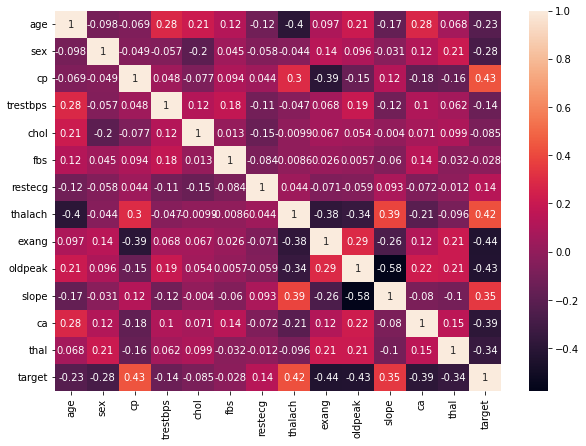

In [144]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True);

### Original Skewness

In [145]:
df[num_cols].skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

### Cuberoot Skewness

In [146]:
np.cbrt(df[num_cols]).skew()

age        -0.452614
trestbps    0.421825
chol        0.394739
thalach    -0.831738
oldpeak    -0.222980
dtype: float64

### Yeojohnson Skewness

In [147]:
for col in num_cols:
    print(col,pd.DataFrame(stats.yeojohnson(df[col])[0])[0].skew())

age -0.052593342639956804
trestbps 0
chol 0
thalach -0.07497515568450419
oldpeak 0.12423780524264987


### Log1p Skewness

In [148]:
np.log1p(df[num_cols]).skew()

age        -0.576101
trestbps    0.284837
chol        0.090242
thalach    -0.995243
oldpeak     0.396825
dtype: float64

### Boxcox Skewness

In [149]:
for col in num_cols:
    print(col,pd.DataFrame(stats.boxcox(df[col]+1)[0])[0].skew())

age -0.052593375576394624
trestbps -0.00100071122134569
chol -0.006209215604500824
thalach -0.07497515568450311
oldpeak 0.12423781236740152


***Best Transformer for numerical columns based on its skewness is Yeojohnson.*** 

# Model Initiation

In [150]:
def normalize(df):
    for col in num_cols:
        df[col] = stats.yeojohnson(df[col])[0]
    return df

In [151]:
def scale(df, scaler):
    scaler_dict = {
        'mm':MinMaxScaler,
        'ss':StandardScaler,
        'rs':RobustScaler
    }
    
    scale_transformer = scaler_dict[scaler]()
    return pd.DataFrame(scale_transformer.fit_transform(df)),scale_transformer

In [162]:
def normalize_n_original_compare(df,mod):  
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    xtrain,xtest,ytrain,ytest = tts(x,y, test_size = .8,random_state = 42)

    model = dtc(random_state = 42)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('original')
    print(cr(ytest,ypred),'\n\n')
    
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    xtrain,xtest,ytrain,ytest = tts(x,y, test_size = .8,random_state = 42)
    xtrain = normalize(xtrain)
    xtest = normalize(xtest)

    model = mod(random_state = 42)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('normalized')
    print(cr(ytest,ypred),'\n\n')

In [168]:
def scaler_compare(df,s,mod):
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    xtrain,xtest,ytrain,ytest = tts(x,y, test_size = .8,random_state = 42)
    
    xtrain = normalize(xtrain)
    xtest = normalize(xtest)

    xtrain,scaler = scale(xtrain,s)
    xtest = pd.DataFrame(scaler.transform(xtest))


    xtrain.columns = x.columns
    xtest.columns = x.columns


    model = mod(random_state = 42)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(scaler)
    print(cr(ytest,ypred),'\n\n')

In [164]:
mods = {
    'dtc':dtc,
    'rfc':rfc
}

In [166]:
for mod in mods:
    print(mod)
    normalize_n_original_compare(df,mods[mod])
    print('\n')

dtc
original
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       109
           1       0.75      0.81      0.78       134

    accuracy                           0.74       243
   macro avg       0.74      0.74      0.74       243
weighted avg       0.74      0.74      0.74       243
 


normalized
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       109
           1       0.77      0.75      0.76       134

    accuracy                           0.74       243
   macro avg       0.73      0.73      0.73       243
weighted avg       0.74      0.74      0.74       243
 




rfc
original
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       109
           1       0.75      0.81      0.78       134

    accuracy                           0.74       243
   macro avg       0.74      0.74      0.74       243
weighted avg       0.74      

# Model Evaluation

In [169]:
for s in ['mm','ss','rs']:
    scaler_compare(df,s,mods['dtc'])

MinMaxScaler()
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       109
           1       0.77      0.75      0.76       134

    accuracy                           0.74       243
   macro avg       0.73      0.73      0.73       243
weighted avg       0.74      0.74      0.74       243
 


StandardScaler()
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       109
           1       0.77      0.75      0.76       134

    accuracy                           0.74       243
   macro avg       0.73      0.73      0.73       243
weighted avg       0.74      0.74      0.74       243
 


RobustScaler()
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       109
           1       0.77      0.75      0.76       134

    accuracy                           0.74       243
   macro avg       0.73      0.73      0.73       243
weighted avg       0.

In [170]:
for s in ['mm','ss','rs']:
    scaler_compare(df,s,mods['rfc'])

MinMaxScaler()
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       109
           1       0.75      0.94      0.83       134

    accuracy                           0.79       243
   macro avg       0.82      0.77      0.78       243
weighted avg       0.81      0.79      0.78       243
 


StandardScaler()
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       109
           1       0.75      0.94      0.83       134

    accuracy                           0.79       243
   macro avg       0.82      0.77      0.78       243
weighted avg       0.81      0.79      0.78       243
 


RobustScaler()
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       109
           1       0.75      0.94      0.83       134

    accuracy                           0.79       243
   macro avg       0.82      0.77      0.78       243
weighted avg       0.

### **Model Comparison**



**Original VS Normalized**

1. DecisionTree<br>
looking at the accuracy normalized and original are just the same as they got 74% accuracy. in terms of how many heart attacks the predicted right from the actual case, DecisionTree is doing better at 84%. and in terms of heart attaack positive case predictions that are correct, Random Forest is doing slightly beter 77% and DecisionTree is at 75%.

2. RandomForest<br>
looking at the accuracy normalized and original, normalized is doing better at 79% and DecisionTree falls short at 74%. in terms of how many heart attacks the predicted right from the actual case, RandomForest is doing better at 94%. and in terms of heart attaack positive case predictions that are correct, Random Forest is doing at 75% as DecisionTree is.

**Scalers Comparison**

between scalers, both models dont actually create divisions. they are predicting with the same performance as when using the non-scaled dataset 

**Decision**

***hence for the final model specification we are going to use is RandomForestClassifier with normalized (yeojohson) dataset and non-scaled***

# Model Tuning

In [188]:
param = {
    'criterion':['gini','entropy'],
    'n_estimators':[100,200,300,400],
    'random_state': [42]
}

x = df[df.columns[:-1]]
y = df[df.columns[-1]]

model = mods['rfc']()
clf = GridSearchCV(model,param)
clf.fit(x,y)
print(clf.best_params_)
display(pd.DataFrame(clf.cv_results_))

{'criterion': 'gini', 'n_estimators': 200, 'random_state': 42}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.208704,0.006378,0.013083,0.002998,gini,100,42,"{'criterion': 'gini', 'n_estimators': 100, 'ra...",0.819672,0.885246,0.836066,0.850000,0.800000,0.838197,0.028843,2
1,0.411456,0.004033,0.020870,0.000902,gini,200,42,"{'criterion': 'gini', 'n_estimators': 200, 'ra...",0.852459,0.901639,0.819672,0.816667,0.816667,0.841421,0.033005,1
2,0.599240,0.011156,0.029111,0.000660,gini,300,42,"{'criterion': 'gini', 'n_estimators': 300, 'ra...",0.836066,0.885246,0.852459,0.833333,0.783333,0.838087,0.033031,3
3,0.773579,0.003574,0.036394,0.000114,gini,400,42,"{'criterion': 'gini', 'n_estimators': 400, 'ra...",0.819672,0.901639,0.852459,0.783333,0.766667,0.824754,0.048569,6
4,0.215729,0.015917,0.011818,0.002086,entropy,100,42,"{'criterion': 'entropy', 'n_estimators': 100, ...",0.836066,0.885246,0.836066,0.816667,0.783333,0.831475,0.033077,4
5,0.394427,0.002381,0.019248,0.000078,entropy,200,42,"{'criterion': 'entropy', 'n_estimators': 200, ...",0.852459,0.868852,0.819672,0.783333,0.783333,0.821530,0.034978,7
6,0.590951,0.003472,0.028117,0.000396,entropy,300,42,"{'criterion': 'entropy', 'n_estimators': 300, ...",0.852459,0.885246,0.819672,0.800000,0.766667,0.824809,0.041084,5
7,0.792098,0.006263,0.036827,0.000583,entropy,400,42,"{'criterion': 'entropy', 'n_estimators': 400, ...",0.852459,0.885246,0.803279,0.800000,0.766667,0.821530,0.042007,7


# Model Finalization

In [190]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

xtrain,xtest,ytrain,ytest = tts(x,y, test_size = .8,random_state = 42)
xtrain = normalize(xtrain)
xtest = normalize(xtest)

model = rfc(random_state = 42,criterion = 'gini',n_estimators = 200)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print('Final Model')
print(cr(ytest,ypred),'\n\n')

Final Model
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       109
           1       0.75      0.95      0.84       134

    accuracy                           0.79       243
   macro avg       0.83      0.78      0.78       243
weighted avg       0.82      0.79      0.79       243
 




### ***Interpretation***

yess!! our final model improved its recall from last best 94% to 95% as the result of using GridSearchCV. wich means we get extra 1% coverage of the actual persons getting heart attack. it's better to have wrong positive heart attack than wrong negative heart attack. i dont think getting heart attack treatment will do healthy peoplo any harm. so if we can cover more heart attack potential people, why not. and our precision is not that bad either 75% means most of our positive heart attack predictions are correct. 

# Model Inference

In [203]:
obs = df[df.columns[:-1]].sample(1)
print('a person health feature')
display(obs)
print('\nheart attack prediction')
model.predict(obs)[0]

a person health feature


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2



heart attack prediction


1